In [1]:
from datasets.preprocessor import Preprocessor_2p5D
from load_config import load_config
from plotting.plotting import make_visual

In [2]:
pre = Preprocessor_2p5D(load_config())

In [51]:
dp = pre.process(15)

/home/bigbrainman/APDS-final-project/src/2p5D/datasets/preprocessor.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seg_arr = torch.tensor(read_nii(seg_file))
/home/bigbrainman/APDS-final-project/src/2p5D/datasets/preprocessor.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  vol_arr = torch.tensor(vol_arr, dtype=torch.float32)


In [52]:
l = dp.slice_list

In [53]:
len(l)

113

In [69]:
vol, seg, _, _ = l[50]

In [70]:
vol.shape, seg.shape

(torch.Size([5, 512, 512]), torch.Size([5, 512, 512]))

In [71]:
%matplotlib ipympl

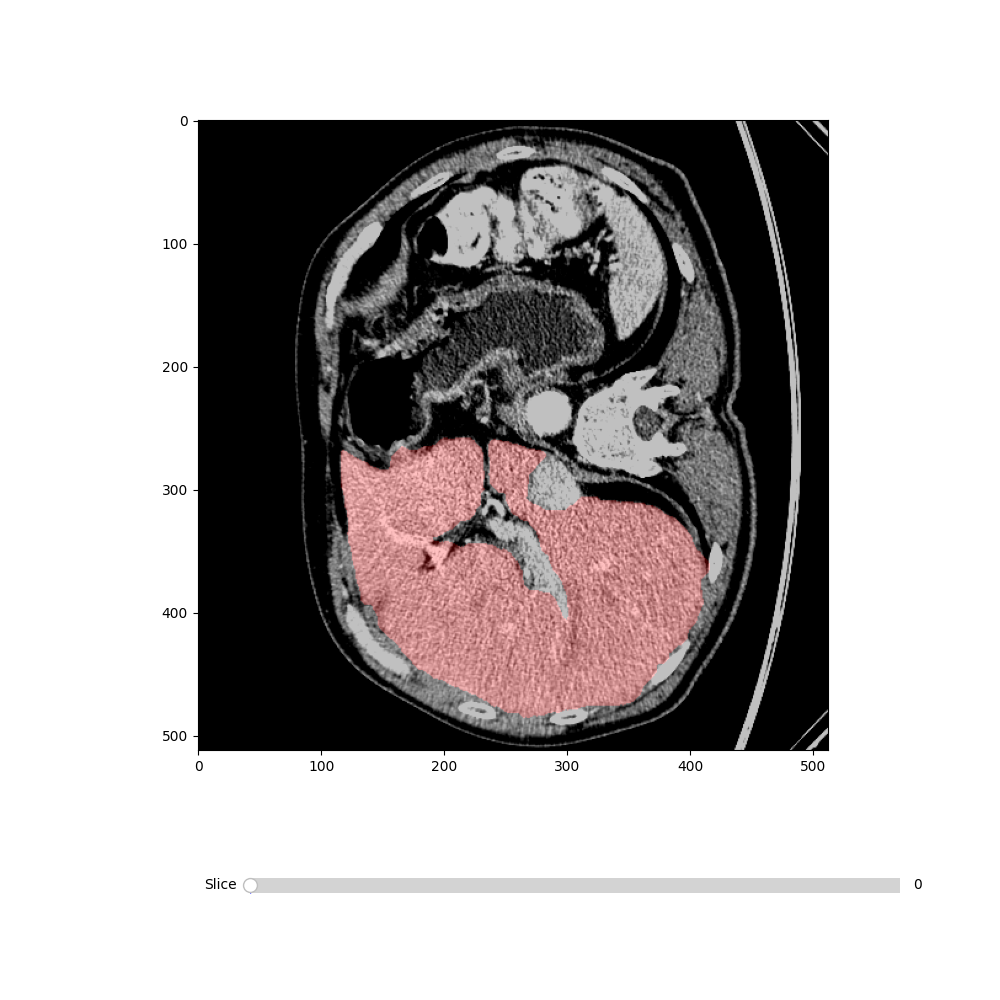

In [72]:
import torch
s = make_visual(vol, seg)